In [18]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [19]:
# 2/21/2019 - 2/20/2024
df=pd.read_csv("AAPL.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1258, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-21,42.950001,43.092499,42.575001,42.764999,41.169819,68998800
1,2019-02-22,42.895000,43.250000,42.845001,43.242500,41.629501,75652800
2,2019-02-25,43.540001,43.967499,43.487499,43.557499,41.932755,87493600
3,2019-02-26,43.427502,43.825001,43.292500,43.582500,41.956833,68280800
4,2019-02-27,43.302502,43.750000,43.182499,43.717499,42.086788,111341600


In [20]:
training_set = df.iloc[:1007, 1:2].values
test_set = df.iloc[1007:, 1:2].values


X_train[0]: This is the first 60-day sequence of stock prices, used as the first input to the model. After reshaping, each price within this sequence is now encapsulated within its own array. So, if originally X_train[0] was [price_1, price_2, ..., price_60], after reshaping, it becomes [[price_1], [price_2], ..., [price_60]]. This means X_train[0] is now a 2D array of shape (60, 1), where each day's price is in its own sub-array, matching the expected input shape for many machine learning models, especially RNNs and LSTMs.

X_train[1]: Similarly, this is the second 60-day sequence of stock prices, with each price also encapsulated within its own array. If the original second sequence was [price_61, price_62, ..., price_120], it becomes [[price_61], [price_62], ..., [price_120]] after reshaping. Like X_train[0], X_train[1] is now a 2D array of shape (60, 1).

In [21]:
# Assuming training_set_scaled has been defined as per your previous steps
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 1007):  # Adjusted to use the full range of your training data
    #day 1 - 60
    X_train.append(training_set_scaled[i-60:i, 0])  # 60 previous days' stock prices
    #day 61 price used for prediction 
    y_train.append(training_set_scaled[i, 0])       # Current day's stock price
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping X_train for LSTM layer input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [22]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 3s 34ms/step - loss: 0.0544
Epoch 2/100
30/30 [==============================] - 1s 32ms/step - loss: 0.0084
Epoch 3/100
30/30 [==============================] - 1s 34ms/step - loss: 0.0071
Epoch 4/100
30/30 [==============================] - 1s 34ms/step - loss: 0.0070
Epoch 5/100
30/30 [==============================] - 1s 34ms/step - loss: 0.0070
Epoch 6/100
30/30 [==============================] - 1s 34ms/step - loss: 0.0069
Epoch 7/100
30/30 [==============================] - 1s 34ms/step - loss: 0.0063
Epoch 8/100
30/30 [==============================] - 1s 33ms/step - loss: 0.0052
Epoch 9/100
30/30 [==============================] - 1s 33ms/step - loss: 0.0056
Epoch 10/100
30/30 [==============================] - 1s 35ms/step - loss: 0.0061
Epoch 11/100
30/30 [==============================] - 1s 34ms/step - loss: 0.0055
Epoch 12/100
30/30 [==============================] - 1s 33ms/step - loss: 0.0060
Epoch 13/100
30/30 [=====

In [23]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:1007, 1:2]
dataset_test = df.iloc[1007:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
# Replace 519 with dynamic value based on inputs length
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(251, 60, 1)


In [24]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 0s 8ms/step


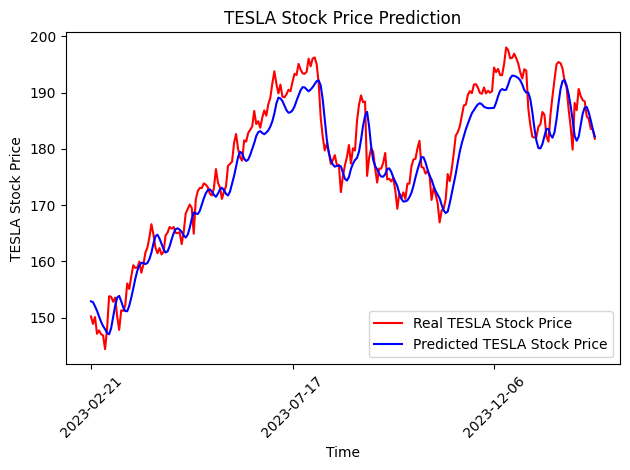

In [25]:
# Visualising the results
plt.plot(df.loc[1007:, "Date"],dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[1007:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")

# Adjust x-ticks
xticks_frequency = 100  # Adjust this value to change the frequency of x-ticks
xticks_rotation = 45  # Adjust this value to rotate the x-tick labels

plt.xticks(np.arange(0, len(df.loc[1007:, "Date"]), xticks_frequency), rotation=xticks_rotation)

plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.tight_layout()  # This will ensure that all labels fit into the figure
plt.show()